### Homewoke 1: Sigmoid, Softmax, KL and cross-entropy

Add your code to the following sections:

```python
    # (1) add your code here
    #-----------------------

    #---------------------------------
```


Grading details:
1. sigm. 20 pts. 
Students can use both the math.exp and np.exp functions. Give 5 extra points to students who can solve the overflow warning.
    
2. dsigm. 20 pts

3. show the sigm and dsigm curves. 10pts

4. kl.  20 pts
Student should consider zero values in p and/or q. If not, reduce 5 points.

4. cross-entropy. 30 pts
students should take care of zeros in q, e.g., using np.clip(). If not reduce 5 points.


### Common issues:
1. Overflow warning of the np.exp(-x) function
2. Didn't deal with 0 in KL divergence
3. Didn't deal with 0 in cross-entropy

sigmoid(0): 0.5
sigmoid(10^(6)): 1.0
sigmoid(-10^(6)): 0.0
derivative of sigmoid(0): 0.25
derivative of sigmoid(10^(6)): 0.0
derivative of sigmoid(-10^(6)): 0.0


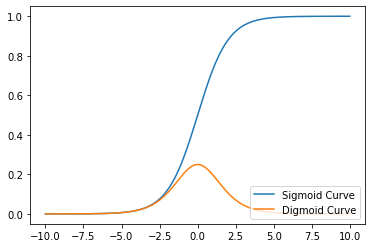

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import decimal

def sigm(x):
    """The logistic sigmoid function
    
    Parameters
    ----------
    x: 1D numpy arrays
    """  
    
    # (1) add your code here 
    #sigm should be able to deal with scalars and vectors
    #-----------------------
    if x >= 0:
        z = np.exp(-x)
        value = 1 / (1 + z)
        return (value)
    else:
        z = np.exp(x)
        value = (z / (1 + z))
        return value
    
def dsigm(x):
    """The derivative of the logistic sigmoid function
    
    Parameters
    ----------
    x: 1D numpy arrays   
    """ 
    
    # (2) add your code here
    #dsigm should be able to deal with scalars and vectors
    if x >= 0:
        z = np.exp(-x)
        value = 1 / (1 + z)
        dvalue = value * (1 - value)
        return (dvalue)
    else:
        z = np.exp(x)
        value = (z / (1 + z))
        dvalue = value * (1 - value)
        return (dvalue)
    #------------------------------
    
# (3) add your code here
#show the curves of the sigm and dsigm functions using plt.plot() function
# from -10 to 10
#------------------------------

print('sigmoid(0):', sigm(0))
print('sigmoid(10^(6)):', sigm(1e6))
print('sigmoid(-10^(6)):', sigm(-1e6))
print('derivative of sigmoid(0):', dsigm(0))
print('derivative of sigmoid(10^(6)):', dsigm(1e6))
print('derivative of sigmoid(-10^(6)):', dsigm(-1e6))
    
#-----------------------    
x = np.arange(-10,10,0.01)
new_u = []
new_du = []
for i in x:
    new_u.append((sigm(i)))
    new_du.append(dsigm(i))
    
new_u = np.array(new_u)
new_du = np.array(new_du)

plt.grid()
plt.plot(x, new_u, label ='Sigmoid Curve')
plt.plot(x, new_du, label ='Digmoid Curve')
plt.legend()
plt.legend(loc='lower right')
plt.grid(False)

#------------------------------

In [4]:
# KL divergience
def KL(p, q):
    
    """KL divergence D(P || Q)
    
    Parameters
    ----------
    p, q : 1D numpy arrays of discrete probability distributions
    
    """
    
    # (4) add your code here
    # Avoid the division-by-zero problem
    #-----------------------
    sum = 0
    
    for i in range(len(p)):
        if p[i] != 0:
            value = (p[i]*np.log(p[i]/q[i]))
        else:
            value = 0
        sum += value
    return(sum)
    #-----------------------

# test code
p = np.array([0.2, 0.8, 0])
q = np.array([0.1, 0.9, 0])

#print(KL(p, q), KL(q, p))
print(KL(p,q), KL(q,p))
#0.04440300758688234 0.036690014034750584

0.04440300758688234 0.036690014034750584


In [483]:
# Cross-entropy

def crossentropy(p, q):
    """The Cross-entropy H(P, Q)
    
    Parameters
    ----------
    p, q : 1D numpy arrays of discrete probability distributions
    
    """  
    # (4) add your code here
    # students should take care of zeros in q 
    #-----------------------
    cross_sum = 0
    for i in range(len(p)):
        if q[i] != 0:
            cross_value = -(p[i]*np.log(q[i]))
        else:
            q[i] = np.clip(q[i], 0.000000000001,1)
            cross_value = -(p[i]*np.log(q[i]))
        cross_sum += cross_value
    return(cross_sum)

    #-----------------------
    
p = np.array([0.2, 0.7, 0.1, 0])
q = np.array([0.1, 0.9, 0, 0.1])

print(crossentropy(p, q), crossentropy(q, p))   
#3.2973714911521426 3.2450533523811242

3.2973714911521426 3.245053352383427
